,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,48.0,70.0,1.005,4.0,0.0,1,-1,1,-1,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,-1,-1,-1,1,1
1,53.0,90.0,1.020,2.0,0.0,-1,-1,1,-1,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,-1,-1,-1,1
2,63.0,70.0,1.010,3.0,0.0,-1,-1,1,-1,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,-1,-1,1,-1
3,68.0,80.0,1.010,3.0,2.0,1,-1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,-1,1,-1
4,61.0,80.0,1.015,2.0,0.0,-1,-1,-1,-1,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,-1,1,1
5,48.0,80.0,1.025,4.0,0.0,1,-1,-1,-1,95.0,163.0,7.7,136.0,3.8,9.8,32.0,6900.0,3.4,1,-1,-1,1,-1,1
6,69.0,70.0,1.010,3.0,4.0,1,-1,-1,-1,264.0,87.0,2.7,130.0,4.0,12.5,37.0,9600.0,4.1,1,1,1,1,1,-1
7,73.0,70.0,1.005,0.0,0.0,1,1,-1,-1,70.0,32.0,0.9,125.0,4.0,10.0,29.0,18900.0,3.5,1,1,-1,1,1,-1
8,73.0,80.0,1.020,2.0,0.0,-1,-1,-1,-1,253.0,142.0,4.6,138.0,5.8,10.5,33.0,7200.0,4.3,1,1,1,1,-1,-1
9,46.0,60.0,1.010,1.0,0.0,1,1,-1,-1,163.0,92.0,3.3,141.0,4.0,9.8,28.0,14600.0,3.2,1,1,-1,1,-1,-1


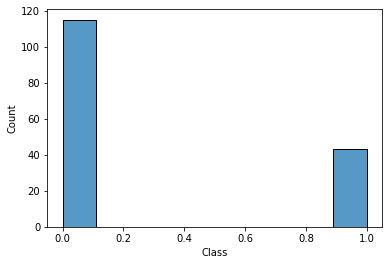

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r"C:\Users\Hassan\Downloads\ckd_clean.csv")

data.head()

data.isna().sum()

cat_data=data.columns[data.dtypes=='object']
cat_data=data[cat_data]
num_df1=data.columns[data.dtypes=='float64']
num_df2=data.columns[data.dtypes=='int64']
num_df=list(num_df1)+list(num_df2)
num_df=data[num_df]

cat_data

liste_all = []

for column in cat_data:
    liste = []
    for value in cat_data[column]:
        try:
            float(value)
        except ValueError:
            liste.append(value)
    liste_all += liste
set(liste_all)

import warnings
warnings.filterwarnings("ignore")




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


data.head()


'''
for i in num_df:
    num_df[i].fillna(num_df[i].mean(),inplace=True)
for i in cat_data:
    cat_data[i].fillna(cat_data[i].mode()[0],inplace=True)
'''


np.unique(cat_data)

new_values = {'yes': 1,'no':-1, 'abnormal':-1, 'normal':1, 'good':1, 'poor':-1,'present':1, 'notpresent':-1}
data.replace(new_values, inplace=True)

y=pd.Series(data.Class)
data.drop('Class',axis=1,inplace=True)

sns.histplot(y);

data

24

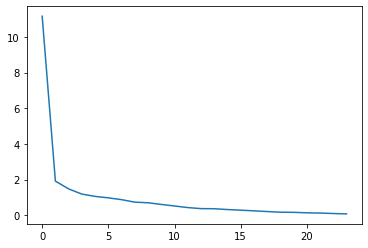

In [ ]:
sc = StandardScaler()
norm = sc.fit_transform(data)

model = PCA()
coord_acp = model.fit_transform(norm)

plt.plot(model.explained_variance_)
y.shape
coord_acp.shape
model.n_components_



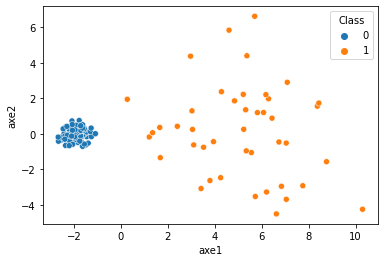

In [ ]:
acp_data=pd.DataFrame({'axe1' : coord_acp[:,0],'axe2' : coord_acp[:,1], 'y': y})

sns.scatterplot(x='axe1', y='axe2', hue=y, data=acp_data);



'\nvariable plus corrélée positivement au premier axe : blood glucose random\nvariable plus corrélée neg au premier axe : red blood cells\nvariable plus corrélée positivement au deuxieme axe : pus cell\nvariable plus corrélée neg au deuxieme axe : sugar\nLes quatre variables de data ont donc une grande part de représentation dans les axes AXE 1 et AXE 2 où elles sont projetées\n'

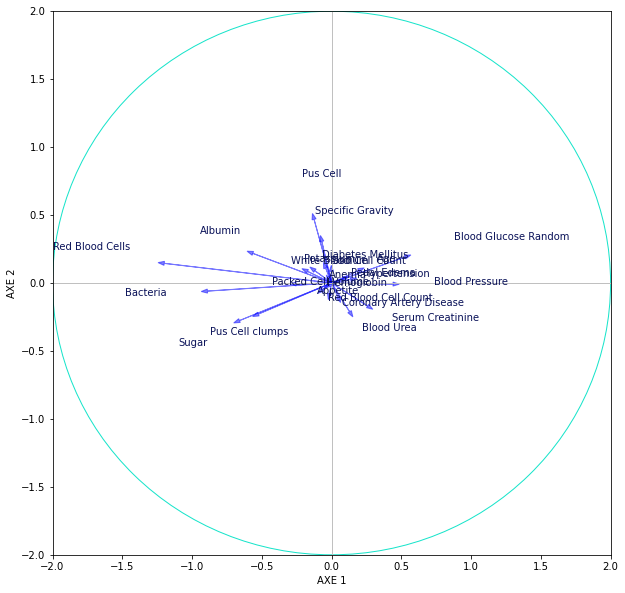

In [ ]:
racine_valeurs_propres = np.sqrt(model.explained_variance_)
corvar = np.zeros((24, 24))
for k in range(24):
    corvar[:, k] = model.components_[:, k] * racine_valeurs_propres[k]

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-2, 2)
axes.set_ylim(-2, 2)

# Affichage des variables
for j in range(24):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')

# Ajout des axes
plt.plot([-2, 2], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-2, 2], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 2, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2');


'''
variable plus corrélée positivement au premier axe : blood glucose random
variable plus corrélée neg au premier axe : red blood cells
variable plus corrélée positivement au deuxieme axe : pus cell
variable plus corrélée neg au deuxieme axe : sugar
Les quatre variables de data ont donc une grande part de représentation dans les axes AXE 1 et AXE 2 où elles sont projetées
'''



<AxesSubplot:xlabel='axe1', ylabel='axe2'>

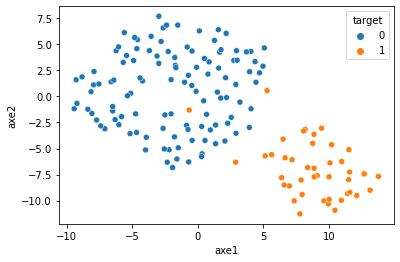

In [ ]:
'''
À présent, nous allons nous intéresser à un autre type de représentation vu lors des exercices faits précédemment:
L'algorithme du T-SNE.
Dans l'ordre :
Créer une instance de la classe TSNE.

Appliquer la T-SNE aux données norm.

Stocker dans un nouveau DataFrame nommé coord_TSNE les 2 premières coordonnées de chaque pointobtenues par TSNE ainsi que la variable cible.

Afficher dans un nuage de points chaque individu coloré en fonction de la variable cible.

'''

from sklearn.manifold import TSNE
tsne = TSNE()
data_tsne = tsne.fit_transform(norm)
coord_TSNE = pd.DataFrame({'axe1': data_tsne[:,0], 'axe2' : data_tsne[:,1], 'target': y})

sns.scatterplot('axe1','axe2', data=coord_TSNE, hue='target')


,PC1,PC2,predictions
0,5.727301,-3.535096,1
1,6.205816,-3.283717,1
2,6.080082,1.198901,1
3,8.373242,1.555314,1
4,7.044920,-0.523491,1


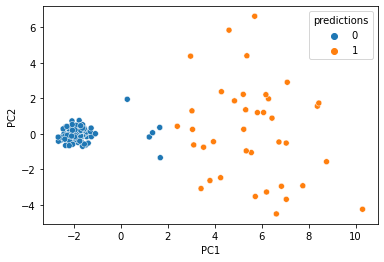

In [ ]:
'''
Dans notre cas, nous avons le diagnostic final du patient.
Dans certains cas, cette variable n'est pas disponible.
Il faut alors déterminer quel point appartient à quel groupe. Pour cela, nous utilisons l'algorithmedes K-moyennes.

Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.

Ajuster le modèle au données coord_acp.

Récupérer les predictions réalisées par l'algorithme.

Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières composantes principales ainsi que la prédiction associée.

Afficher les résultats sur un graphe.



'''

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(coord_acp)
pred = kmeans.predict(coord_acp)

pred

coord_acp_kmeans = pd.DataFrame({'PC1' : coord_acp[:,0], 'PC2' : coord_acp[:,1], 'predictions' : pred})

sns.scatterplot(data = coord_acp_kmeans, x='PC1',y='PC2', hue='predictions')

coord_acp_kmeans.head()

In [ ]:

'''
Afficher le nombre de patients appartenant à chacun des groupes obtenus par le K-Means
'''

coord_acp_kmeans['predictions'].value_counts()





0    120
1     38
Name: predictions, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

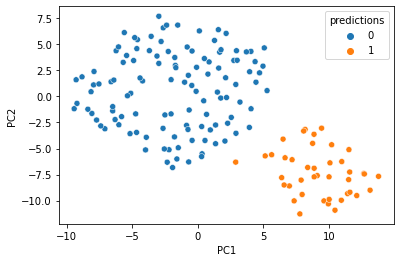

In [ ]:

"""

Comme dans le cas précédent, nous allons appliquer l'algorithme des K-Means sur les coordonnées calculées par le T-SNE.

Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.

Ajuster le modèle au données coord_TSNE.

Récupérer les predictions réalisées par l'algorithme.

Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières composantesprincipales ainsi que la prédiction associée.

Afficher les résultats sur un nuage de points.
"""

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(coord_TSNE)
pred = kmeans2.predict(coord_TSNE)

coord_tsne_kmeans = pd.DataFrame({'PC1' : coord_TSNE['axe1'], 'PC2' : coord_TSNE['axe2'], 'predictions' : pred})

sns.scatterplot('PC1','PC2', data = coord_tsne_kmeans, hue='predictions')

